# Simulation data Analytics

## Imports

In [4]:
import os
from itertools import zip_longest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [5]:
UUID = '526a9ccf-2e94-479c-9f87-2c969fd09f3b (isolation, mask, vaccine)'
# UUID = '04c3d7f1-c80e-4843-b56f-d9e221763f99 (isolation)'
# UUID = '323cd3e1-8442-4500-adca-be75c1b3955a (null)'
# UUID = '2757c169-0ed1-47be-9253-4f698618d0ce'
FOLDER_DIR = os.path.join('..', 'dist', 'results', UUID)

In [6]:
cells = pd.read_csv(os.path.join(FOLDER_DIR, 'sheet', 'cells.csv'))
steps = pd.read_csv(os.path.join(FOLDER_DIR, 'sheet', 'steps.csv'))
prevt = pd.read_csv(os.path.join(FOLDER_DIR, 'sheet', 'prevt.csv'))

In [7]:
def add_vertical_lines():
    for column, color in zip(prevt.columns, ['orange', 'blue', 'green']):
        value = prevt.loc[0, column]
        if not value:
            continue
        plt.axvline(x=prevt.loc[0, column], color=color, label=column)

## Create filtered data

In [8]:
infected = steps.copy()
dead = steps.copy()
infected_by_day = steps.copy()
dead_by_day = steps.copy()


for column in steps.columns:
    infected[column] = steps[column].apply(lambda x: x in ('EXPOSED', 'INFECTOUS'))
    
    dead[column] = steps[column].apply(lambda x: x in ('DEAD'))
    
    infected_by_day[column] = steps[column].apply(lambda x: 0)
    if 'EXPOSED' in steps.loc[:, column].unique():
        infected_by_day.loc[np.argmax((steps.loc[:, column] == 'EXPOSED')), column] = 1
    
    dead_by_day[column] = steps[column].apply(lambda x: 0)
    if 'DEAD' in steps.loc[:, column].unique():
        dead_by_day.loc[np.argmax((steps.loc[:, column] == 'DEAD')), column] = 1

In [9]:
dead_by_age = dead.copy()
dead_by_age.columns = cells.age.astype(int)
dead_by_age = dead_by_age.sum(axis=0).groupby('age').sum().sort_index()

### Pessoas contaminadas

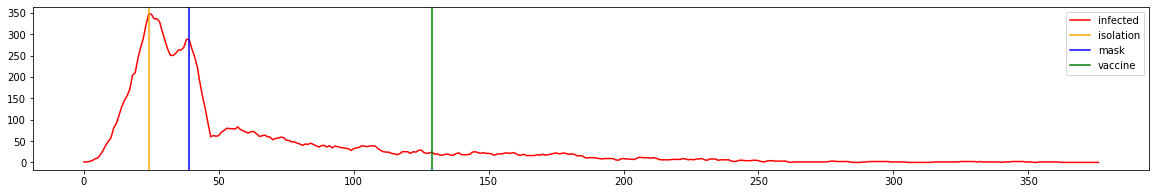

In [10]:
plt.figure(figsize=(20,3))
data = infected.sum(axis=1)

plt.plot(data.values, color='r', label='infected')
add_vertical_lines()
plt.legend()

### Pessoas contaminadas por dia

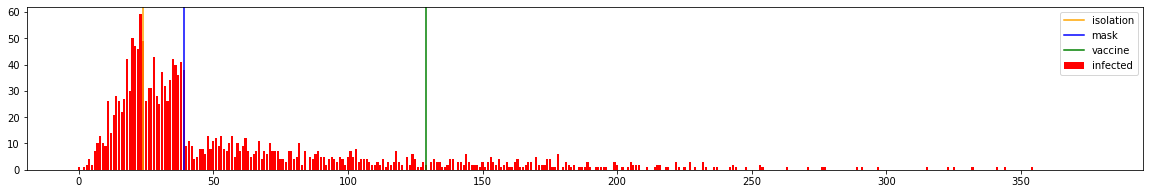

In [11]:
plt.figure(figsize=(20,3))
data = infected_by_day.sum(axis=1)

plt.bar(data.index, data.values, color='r', label='infected')
add_vertical_lines()
plt.legend()

### Pessoas mortas acumuladas

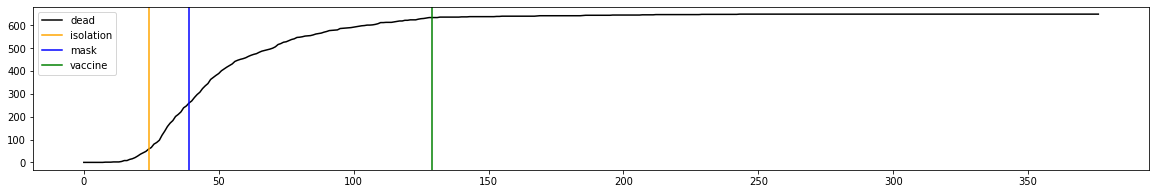

In [12]:
plt.figure(figsize=(20,3))
data = dead.sum(axis=1)

plt.plot(data.values, color='black', label='dead')
add_vertical_lines()
plt.legend()

### Pessoas mortas por dia

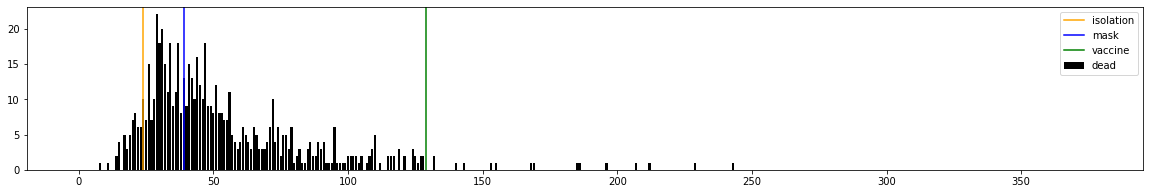

In [13]:
plt.figure(figsize=(20,3))
data = dead_by_day.sum(axis=1)

plt.bar(data.index, data.values, color='black', label='dead')
add_vertical_lines()
plt.legend()

### Pessoas mortas por idade

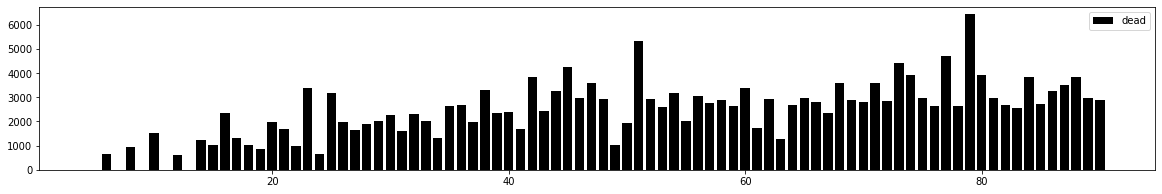

In [14]:
plt.figure(figsize=(20,3))
data = dead_by_age

plt.bar(data.index, data.values, color='black', label='dead')
plt.legend()